# Cargo las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Utilizo la libreria glob para acceder a la carpeta de archivos y un bucle para leer y almacenar los archivos csv

In [2]:
files = glob.glob(r'C:\Users\Ramiro\Guns_death_EDA/*.csv')
all_data = []
df = []

for file in files:
    archivo = pd.read_csv(file,sep=',')
    all_data.append(archivo)
  
df = pd.concat(all_data, ignore_index=True)
df


,year,month,intent,police,sex,age,race,hispanic,place,education
0,2006,1,Suicide,0,M,81.0,White,100,Home,HS/GED
1,2006,1,Homicide,0,M,55.0,White,100,Other unspecified,Less than HS
2,2006,1,Homicide,0,M,19.0,Black,100,Home,Less than HS
3,2006,1,Homicide,0,M,33.0,Black,100,Other unspecified,Less than HS
4,2006,1,Homicide,0,M,23.0,Black,100,Home,Less than HS
...,...,...,...,...,...,...,...,...,...,...
529228,2020,12,Suicide,0,M,35.0,Hispanic,275,Home,Some college
529229,2020,12,Homicide,0,M,34.0,Black,100,Street,HS/GED
529230,2020,12,Homicide,0,M,26.0,Black,100,Street,HS/GED
529231,2020,12,Homicide,0,M,24.0,Black,100,Trade/service area,HS/GED


### Get info 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529233 entries, 0 to 529232
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       529233 non-null  int64  
 1   month      529233 non-null  int64  
 2   intent     529206 non-null  object 
 3   police     529233 non-null  int64  
 4   sex        529233 non-null  object 
 5   age        529156 non-null  float64
 6   race       529233 non-null  object 
 7   hispanic   529233 non-null  int64  
 8   place      522573 non-null  object 
 9   education  516025 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 40.4+ MB


#### Get missing data in columns

In [4]:
df.isna().sum()

year             0
month            0
intent          27
police           0
sex              0
age             77
race             0
hispanic         0
place         6660
education    13208
dtype: int64

In [5]:
df.race.unique()

array(['White', 'Black', 'Hispanic', 'Asian/Pacific Islander',
       'Native American/Native Alaskan'], dtype=object)

In [6]:
df.intent.unique()

array(['Suicide', 'Homicide', 'Accidental', 'Undetermined', nan],
      dtype=object)

In [7]:
df.describe()

,year,month,police,age,hispanic
count,529233.000000,529233.000000,529233.000000,529156.000000,529233.000000
mean,2013.480724,6.569454,0.012824,42.918429,115.337774
std,4.359197,3.400949,0.112516,19.485696,61.992719
min,2006.000000,1.000000,0.000000,0.000000,100.000000
25%,2010.000000,4.000000,0.000000,26.000000,100.000000
50%,2014.000000,7.000000,0.000000,40.000000,100.000000
75%,2017.000000,9.000000,0.000000,57.000000,100.000000
max,2020.000000,12.000000,1.000000,109.000000,998.000000


## How many people died by diferent ways of intent?

In [8]:

def diferent_intent(df):
    return dict(df['intent'].value_counts())

for intent , count in diferent_intent(df).items():

    print(f'El numero de peronas que murieron por {intent} fue de {count}')


El numero de peronas que murieron por Suicide fue de 315225
El numero de peronas que murieron por Homicide fue de 201468
El numero de peronas que murieron por Accidental fue de 8186
El numero de peronas que murieron por Undetermined fue de 4327


## How many people by race died of the diferent intent ?

In [9]:
def diferent_intent(df):
    return dict(df.groupby(['intent','race']).size())


for (intent,raza), count in diferent_intent(df).items():
    print('En el lapso de 16 años {} {} han muerto de forma {}'.format(count,raza,intent))


En el lapso de 16 años 88 Asian/Pacific Islander han muerto de forma Accidental
En el lapso de 16 años 1657 Black han muerto de forma Accidental
En el lapso de 16 años 767 Hispanic han muerto de forma Accidental
En el lapso de 16 años 140 Native American/Native Alaskan han muerto de forma Accidental
En el lapso de 16 años 5534 White han muerto de forma Accidental
En el lapso de 16 años 3204 Asian/Pacific Islander han muerto de forma Homicide
En el lapso de 16 años 112328 Black han muerto de forma Homicide
En el lapso de 16 años 33738 Hispanic han muerto de forma Homicide
En el lapso de 16 años 2018 Native American/Native Alaskan han muerto de forma Homicide
En el lapso de 16 años 50180 White han muerto de forma Homicide
En el lapso de 16 años 4035 Asian/Pacific Islander han muerto de forma Suicide
En el lapso de 16 años 18445 Black han muerto de forma Suicide
En el lapso de 16 años 17468 Hispanic han muerto de forma Suicide
En el lapso de 16 años 2741 Native American/Native Alaskan han

In [10]:
a = df[df['race'] == 'Black']
a.shape[0]

# c = 0
# for i in b:
#     c+= i
# print(c)

133240

## Which year had more intent?

In [11]:
intent_year = df.groupby('year').size()
max_year = intent_year.idxmax()
max_death = intent_year.max()
print(f'El año con más muertes fue {max_year} con {max_death} muertes')

El año con más muertes fue 2020 con 45222 muertes


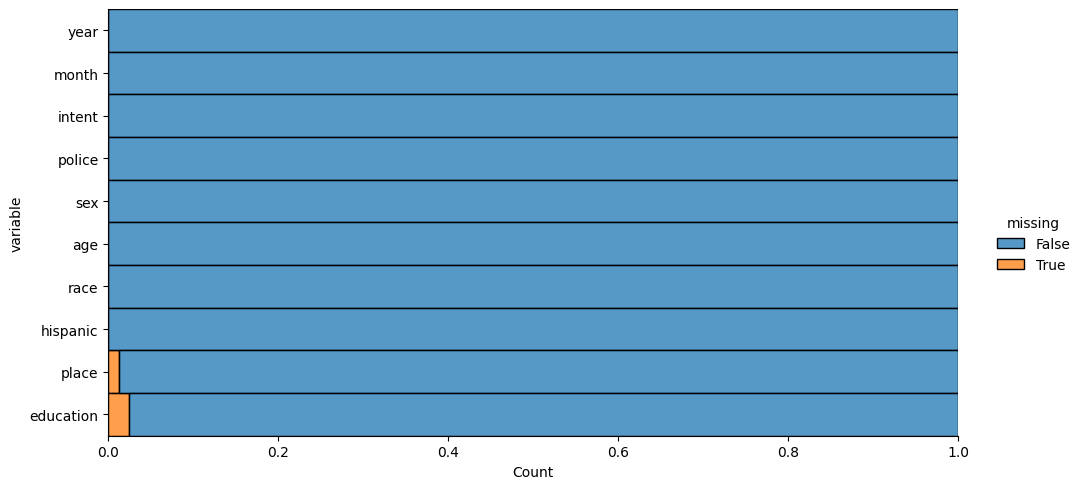

In [12]:
(
    df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)



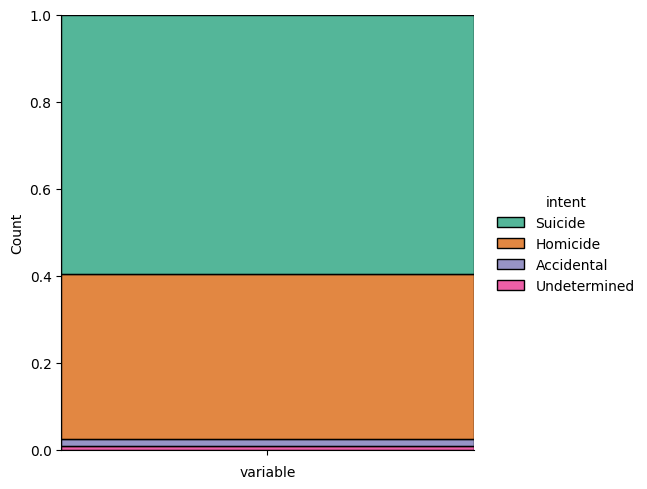

In [26]:
(
    df
    .assign(variable = '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='intent',
                multiple='fill',
                palette= 'Dark2'
            )
        )
    )
)

In [13]:
df.columns

Index(['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic',
       'place', 'education'],
      dtype='object')

In [14]:
df.age = df.age.astype('Int64')

# In the nexts plots we'll se if numerical variables has any relation

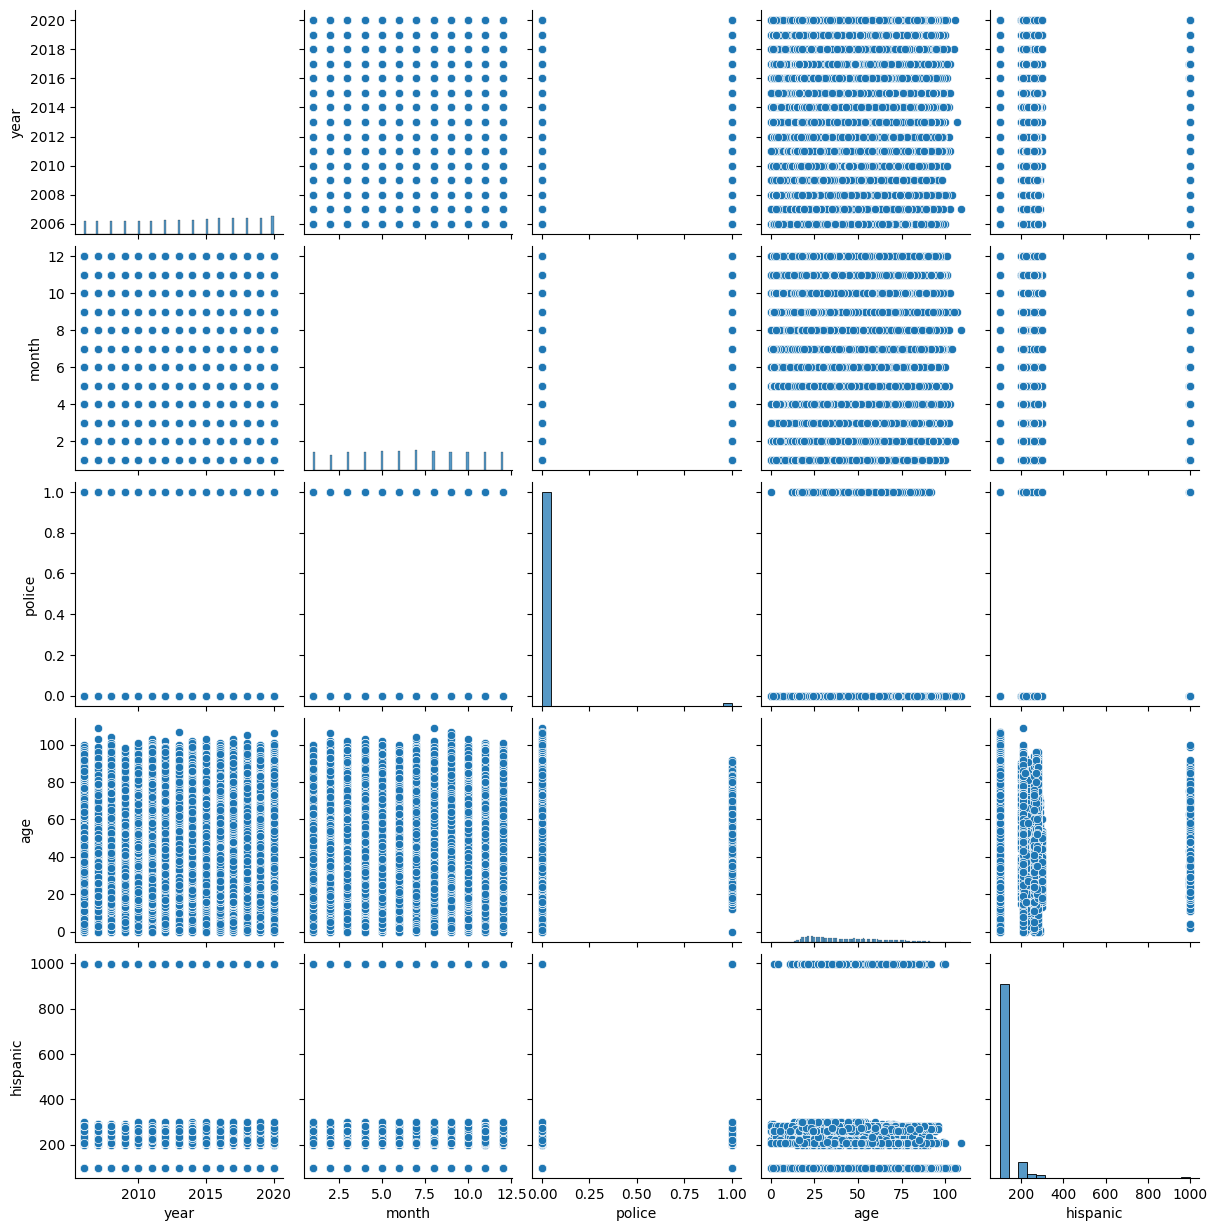

In [15]:
sns.pairplot(df);

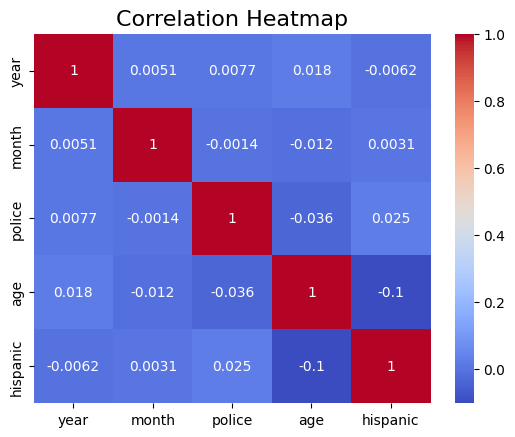

In [16]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm')
plt.title("Correlation Heatmap", fontsize=16);

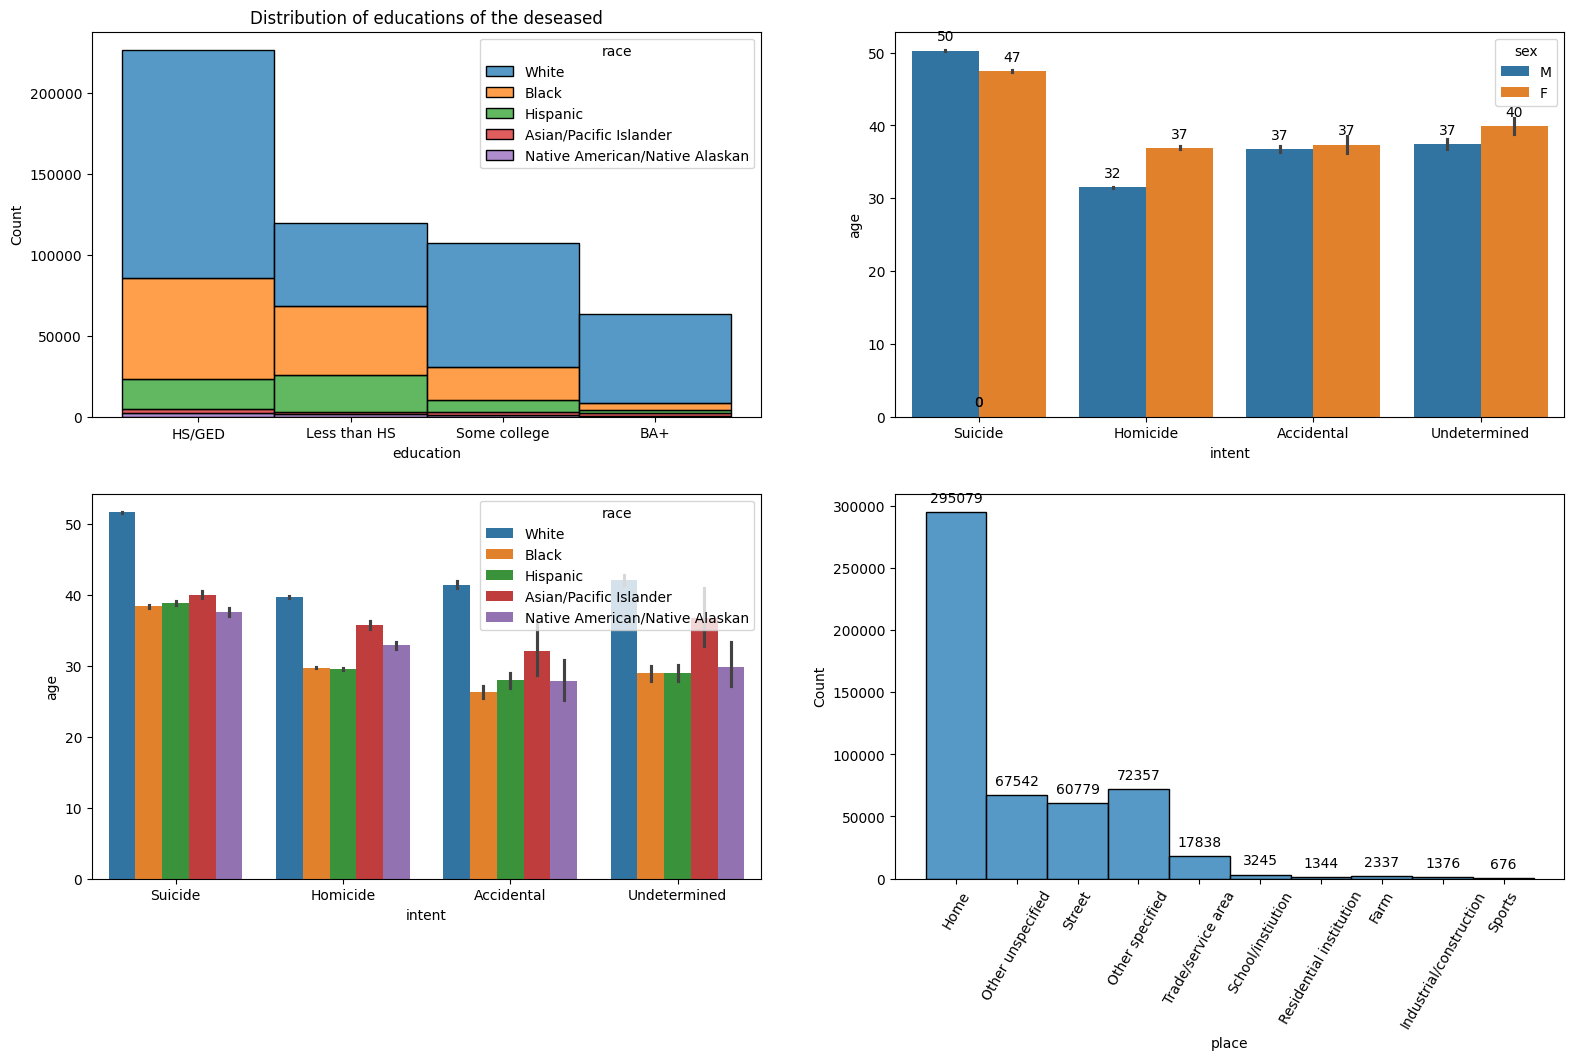

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(19,11))
sns.histplot(data=df, x='education',
             ax=axes[0, 0], hue='race', multiple='stack')
axes[0, 0].set_title("Distribution of educations of the deseased")
sns.barplot(data=df, x=df.intent, y='age', ax=axes[0, 1], hue='sex')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.barplot(data=df, x=df.intent, y='age', ax=axes[1, 0], hue='race')
sns.histplot(data=df, x=df.place, ax=axes[1,1])
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=60)
plt.show()

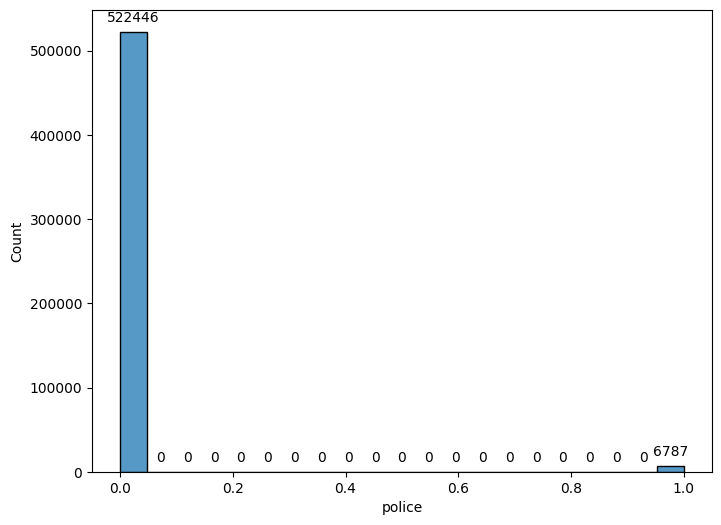

In [18]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='police')
for p in axes.patches:
    axes.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Month were was max death by intent

In [19]:
pd.pivot_table(df,
               index=['intent'],
               columns=[ 'year'],
               aggfunc={'month': 'count'})


month                                                           
year           2006   2007   2008   2009   2010   2011   2012   2013   2014   
intent                                                                        
Accidental      642    613    592    554    606    591    548    505    586  \
Homicide      13151  12983  12505  11826  11422  11522  12093  11674  11409   
Suicide       16883  17352  18223  18735  19392  19990  20666  21175  21334   
Undetermined    220    276    273    232    252    248    256    281    270   

                                                        
year           2015   2016   2017   2018   2019   2020  
intent                                                  
Accidental      489    495    486    458    486    535  
Homicide      13458  14925  15095  14497  14914  19994  
Suicide       22018  22938  23854  24432  23941  24292  
Undetermined    282    300    338    353    346    400

In [20]:
def max_death_year_by_intent(df):
    results = {}

    for intent in df['intent'].unique():
        intent_subset = df[df['intent'] == intent]

        if not intent_subset.empty:
            max_year = intent_subset.groupby('year').size().idxmax()
            results[intent] = max_year

    return results

max_death_years = max_death_year_by_intent(df)
max_death_years


{'Suicide': 2018, 'Homicide': 2020, 'Accidental': 2006, 'Undetermined': 2020}

In [21]:
df['age'] = df['age'].astype('float')
df['age'] = df['age'].fillna(df['age'].mean())


In [22]:
print(df.dtypes)

year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
hispanic       int64
place         object
education     object
dtype: object
